# Stock Prediction

#### <H3 style="color:red">Objective-</H3> Extract stock data of any one company from https://finance.yahoo.com/. Per hour per IP address one can pass 2000 requests, on an average. (note: there might be frequent changes to the request count by Yahoo Finance). Build a pipeline to extract the data on ongoing basis and forecast stock (long term and short term). Team can decide the definition of long term and short term. Adjusted closing price must be forecasted.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

#### Provide users option to select their favourite stock to Analyze and Forecast 

In [249]:
comp_list = []  # Create an empty list for the companies
stock_name1 = input("Enter the Stock Name you want to Analyze & forecast(e.g. AAPL) ")
comp_list.append(stock_name1)

stock_name2 = 'DJIA'
comp_list.append(stock_name2)


Enter the Stock Name you want to Analyze & forecast(e.g. AAPL) AAPL


In [250]:
comp_list

['AAPL', 'DJIA']

#### Extract Stock Price Data for Selected company and Dow Jones Industrial Average 

In [251]:
#'AAPL', 'GOOG', 'MSFT', 'AMZN'


end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in comp_list:
    globals()[stock] = yf.download(stock, start, end)
    
company_list = [eval(x) for x in comp_list]
#company_list = [AAPL, DJIA]
company_name = comp_list
#["Company1", "DJIA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name


df = pd.concat(company_list, axis=0)

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-02-25,163.839996,165.119995,160.869995,164.850006,163.857407,91974200,AAPL
2022-02-28,163.059998,165.419998,162.429993,165.119995,164.125778,95056600,AAPL
2022-03-01,164.699997,166.600006,161.970001,163.199997,162.217331,83474400,AAPL
2022-03-02,164.389999,167.360001,162.949997,166.559998,165.557114,79724800,AAPL
2022-03-03,168.470001,168.910004,165.550003,166.229996,165.229095,76678400,AAPL


In [252]:
# Summary Stats
DJIA.describe()
#AMZN.describe()
#AAPL.describe()
#MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,22.915112,23.006522,22.727550,22.840873,21.863033,37308.278884
std,1.349312,1.323118,1.311323,1.315488,0.832514,32963.009091
min,20.309999,20.629999,20.170000,20.309999,19.706259,4100.000000
25%,21.980000,22.110001,21.830000,21.950001,21.486891,20700.000000
50%,22.580000,22.660000,22.389999,22.510000,21.850319,29800.000000
75%,23.595000,23.665000,23.440001,23.570000,22.216763,46000.000000
max,25.920000,25.920000,25.500000,25.629999,23.717159,411900.000000


## 1. Adjusted Closing Price
#### Analyzing Adjusted Closing Price and compare with industrial average
The adjusted closing price of a stock takes into account any dividends paid out to shareholders. This means that if a stock is priced at Rs. 100 and pays a dividend of INR 5 per share, the adjusted closing price would be Rs. 95. Essentially, the adjusted closing price reflects the true value of the stock after accounting for any dividend payments.

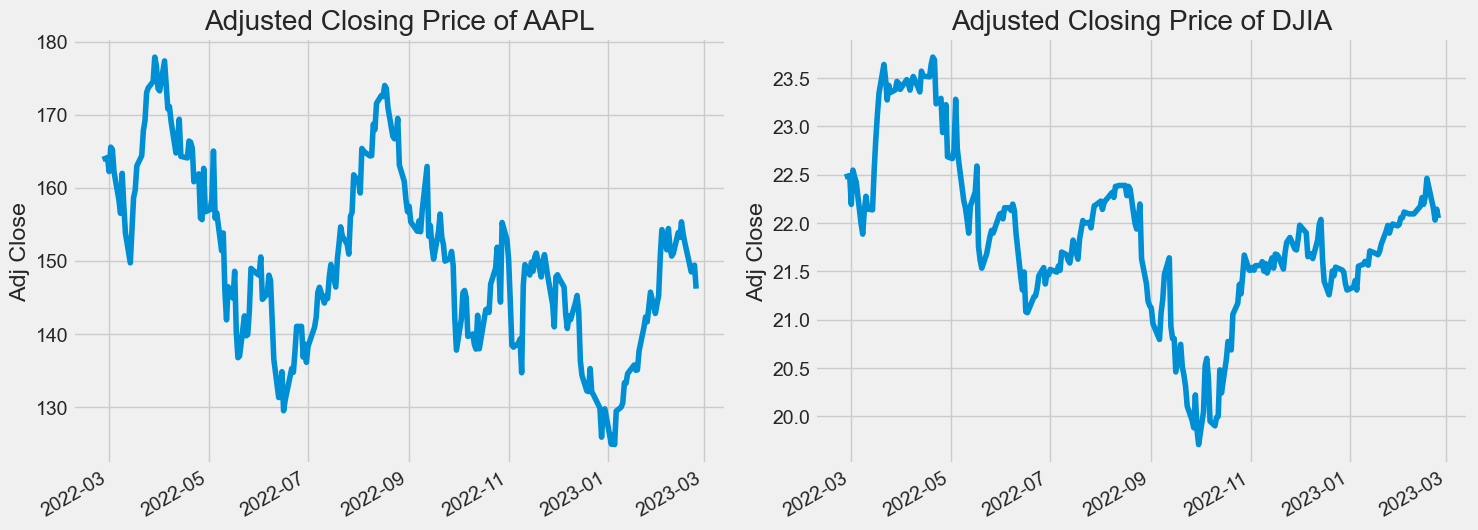

In [253]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Adjusted Closing Price of {comp_list[i - 1]}")
    
plt.tight_layout()

## 2. Volume of Stock Sales
#### Analyzing vloume of sales and compare with industrial average(DJI)
Volume refers to the quantity of a security or asset that is exchanged during a given period, typically within a day. The trading volume of a stock, for instance, would indicate the total number of shares that were traded between the opening and closing of the market on that day. Analyzing the trading volume and its fluctuations over time is an essential factor for technical traders in making investment decisions.

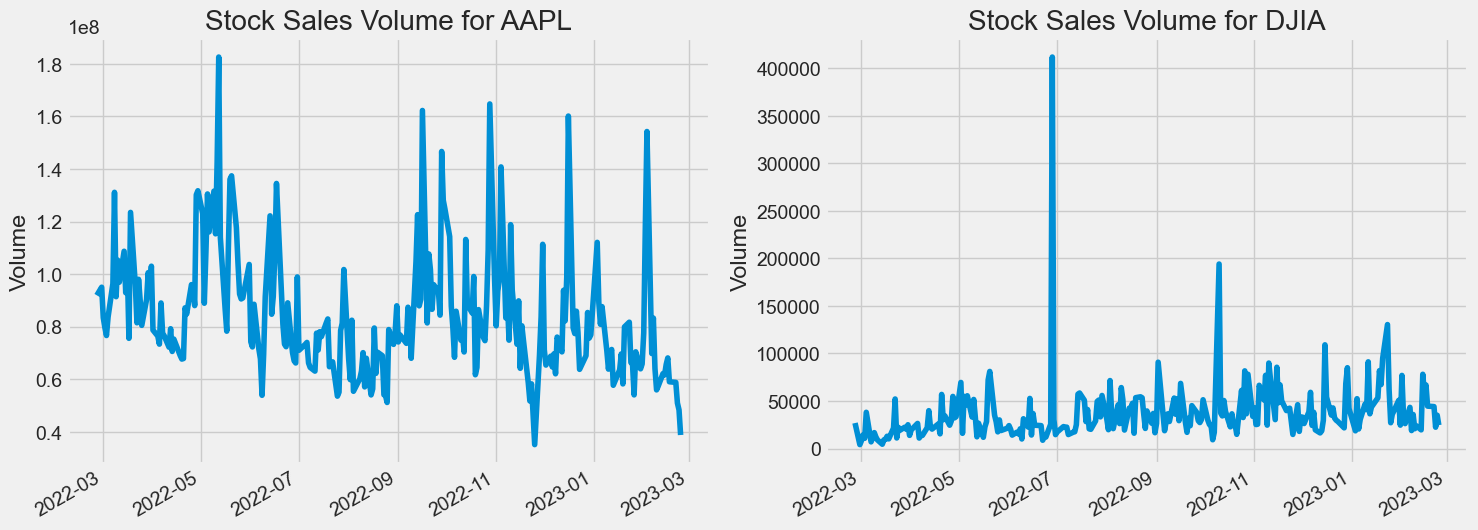

In [254]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Stock Sales Volume for {comp_list[i - 1]}")
    
plt.tight_layout()

## 3. Moving Average
#### Analyzing vloume of sales and compare with industrial average(DJI)
A widely used technical analysis tool in trading is the Moving Average (MA), which helps to eliminate fluctuations in price data by calculating a continuously updated average price. The calculation involves taking an average of the price data over a predetermined time period, which could be as short as 20 minutes or as long as 50 weeks, based on the trader's preference.

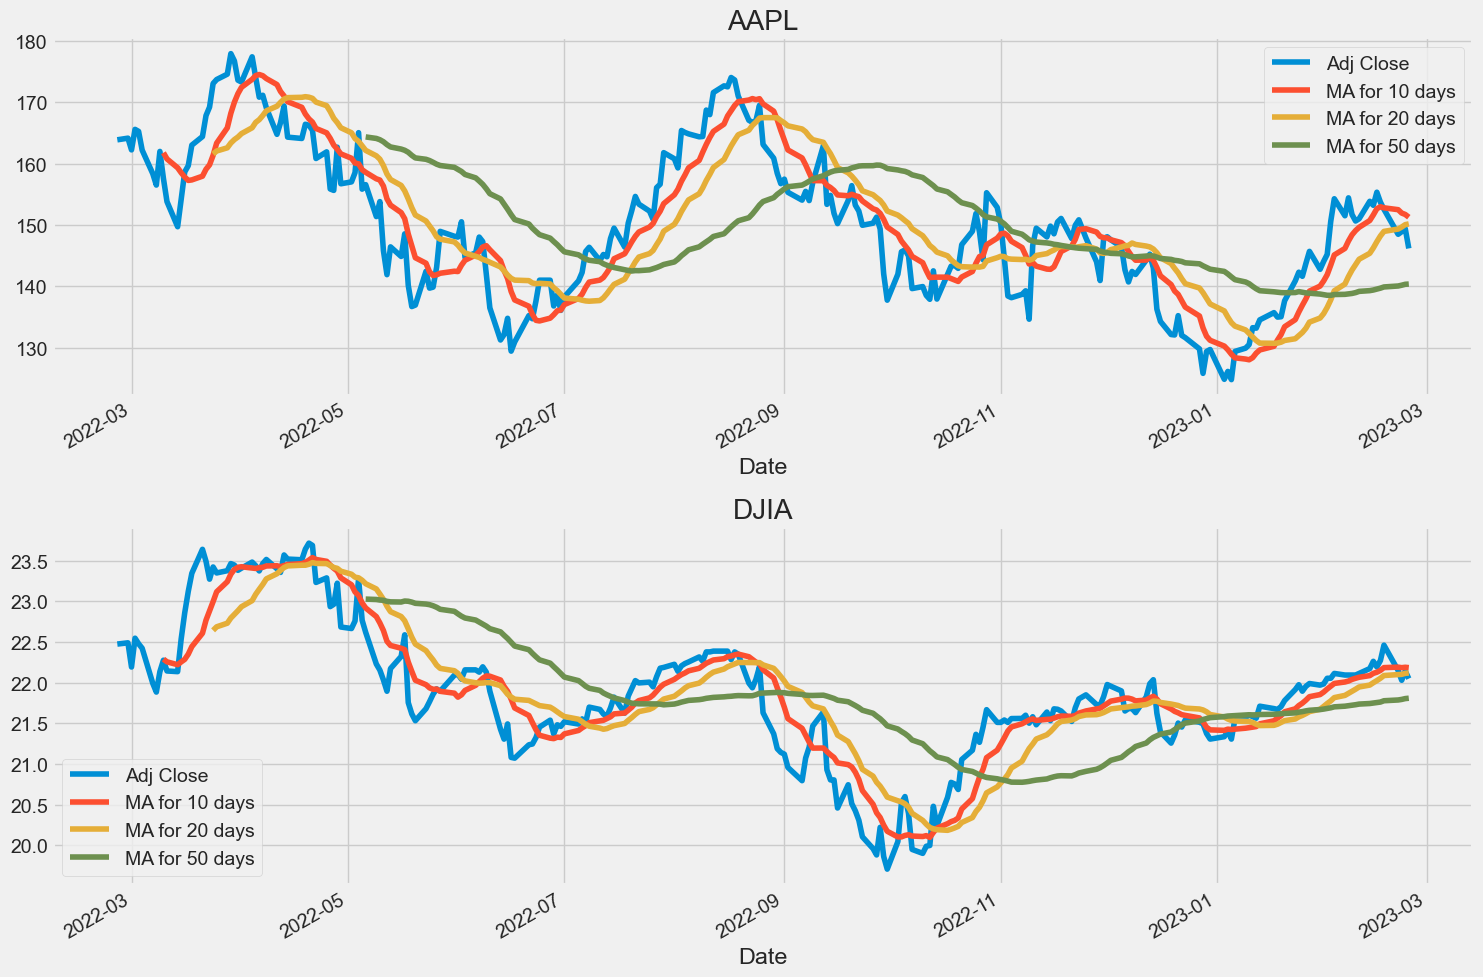

In [255]:
stock_name2=eval(stock_name1)
moving_avg_day = [10, 20, 50]

for ma in moving_avg_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_name2[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title(stock_name1)

DJIA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('DJIA')



fig.tight_layout()


## 4. Average Daily Return of the Stock
After completing some initial analysis, we will now conduct a more detailed evaluation by examining the risk associated with the stock. To achieve this, we need to analyze the daily fluctuations in the stock price rather than just its overall value. For this purpose, we will leverage the capabilities of the pandas library to obtain the daily returns for Chosen stock and compare with industry average.

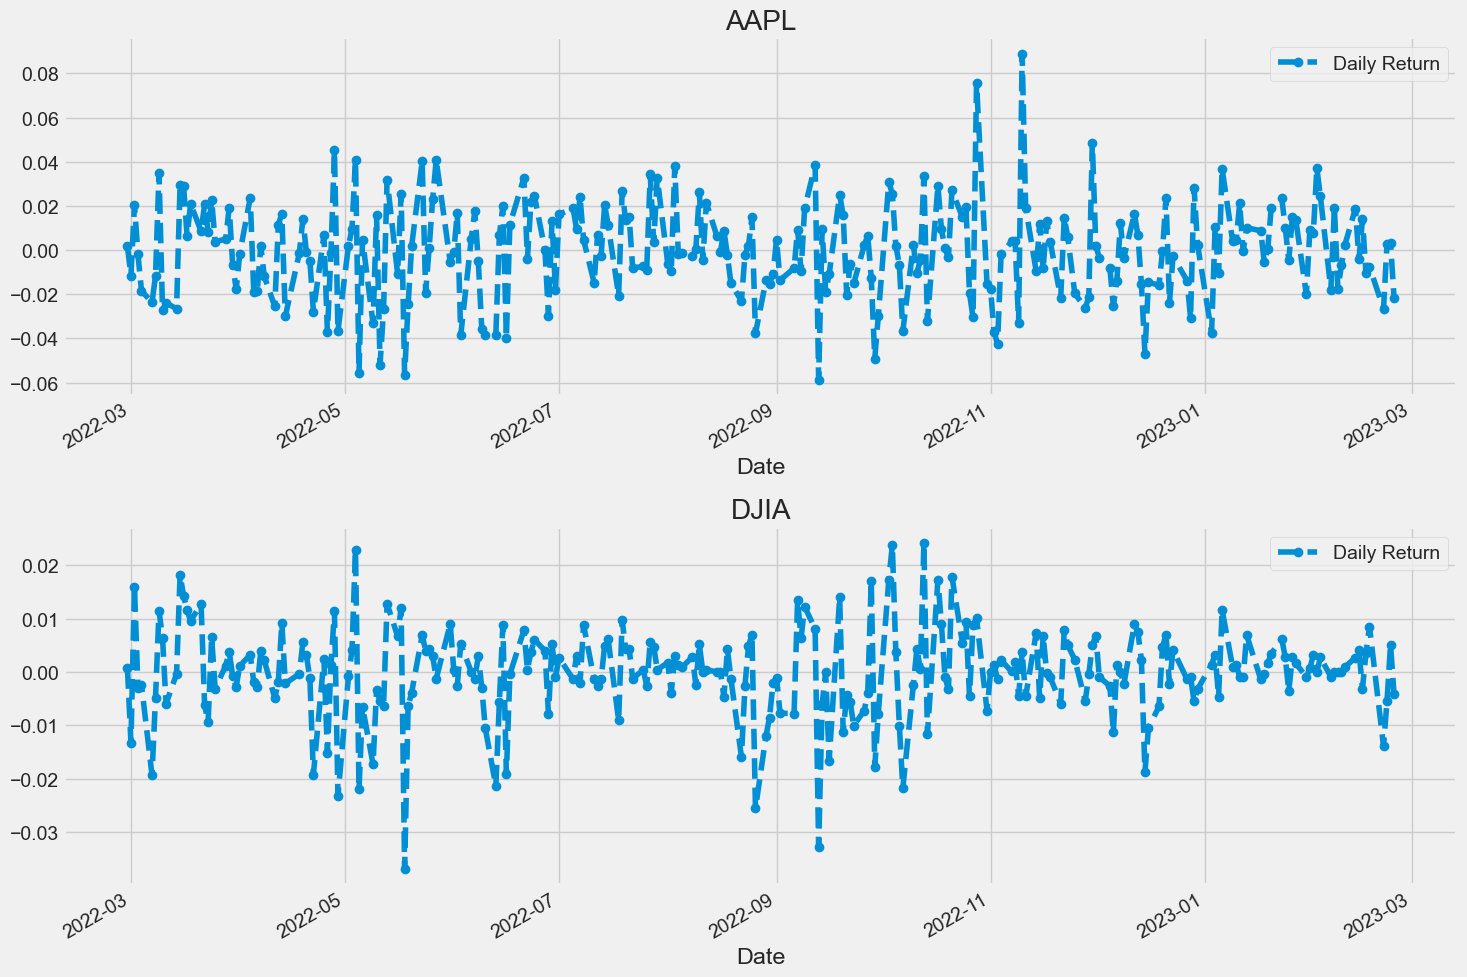

In [256]:
# Using pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting the daily return percentage
fig, axes = plt.subplots(nrows=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_name2['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title(stock_name1)

DJIA['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('DJIA')



fig.tight_layout()

#### Histogram of Averge Daily Return chosen stock against Industry Average

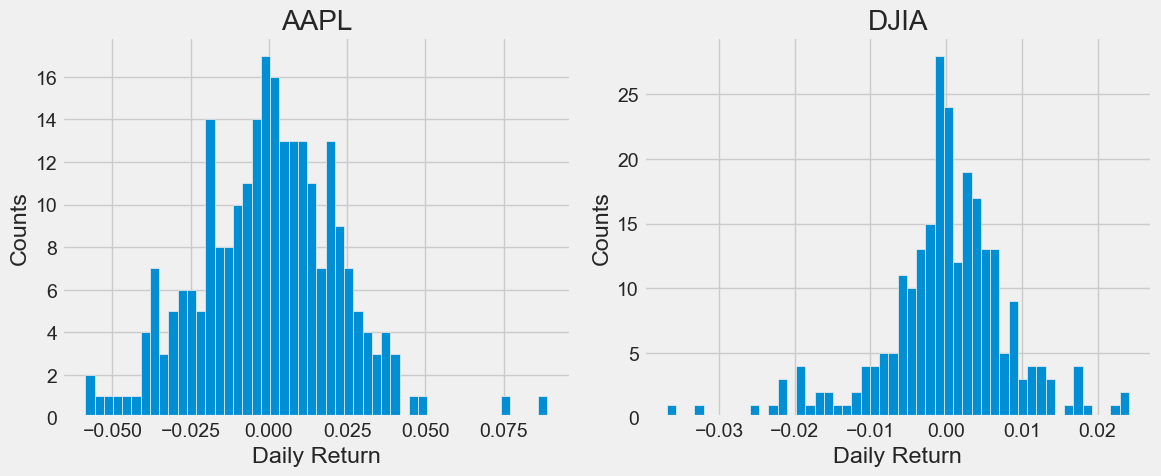

In [257]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## 5. Hypothesis Test
#### Null - Stocks of Big Enterprizes determines direction of Industry and are Correlated
#### Alterrnate- Stock Prices of Big Enterprizes and no correction with Industry average
##### Checking Correlation between chosen stocks

In [258]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(comp_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
comp_rets = closing_df.pct_change()
comp_rets.head()

[*********************100%***********************]  2 of 2 completed


,AAPL,DJIA
Date,,
2022-02-25,NaN,NaN
2022-02-28,0.001638,0.000691
2022-03-01,-0.011628,-0.013253
2022-03-02,0.020588,0.015986
2022-03-03,-0.001981,-0.003041


In [241]:
#comp_rets.to_csv('stock.csv')

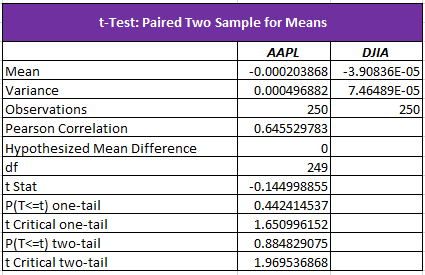

##### Since, the P> 0.05, we cannot reject the Null Hypothesis and say that stocks of Big Enterprizes determines direction of Industry and are positively Correlated to the Industry Average

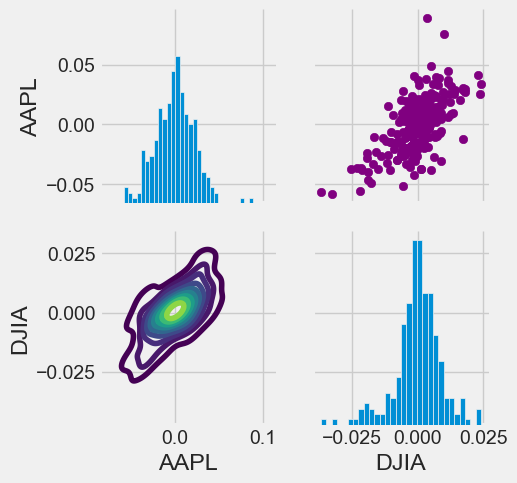

In [242]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(comp_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='viridis')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

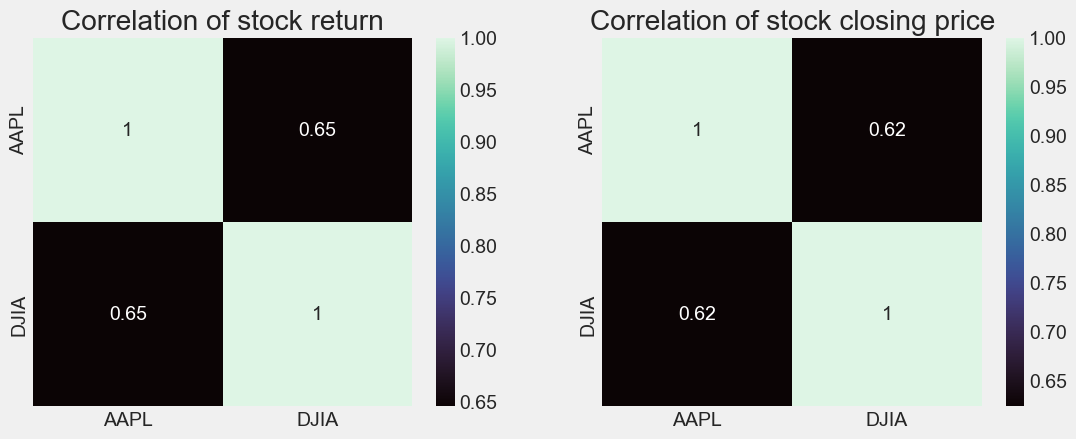

In [244]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(comp_rets.corr(), annot=True, cmap='mako')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='mako')
plt.title('Correlation of stock closing price')

## 6. Risk Analysis

#### Analyse Risk with investment in each stock against Industry Average
Comparing the expected return with the standard deviation of daily returns is a simple method of quantifying risk in finance. The expected return represents the average return an investor can anticipate from an investment over a specified time period, while the standard deviation of daily returns gauges the level of volatility of an investment.

If the standard deviation of daily returns is high, it indicates that the returns are significantly different from the expected return, implying a higher level of risk. In contrast, a lower standard deviation of daily returns indicates lower risk because the returns are more predictable and less likely to deviate considerably from the expected value.

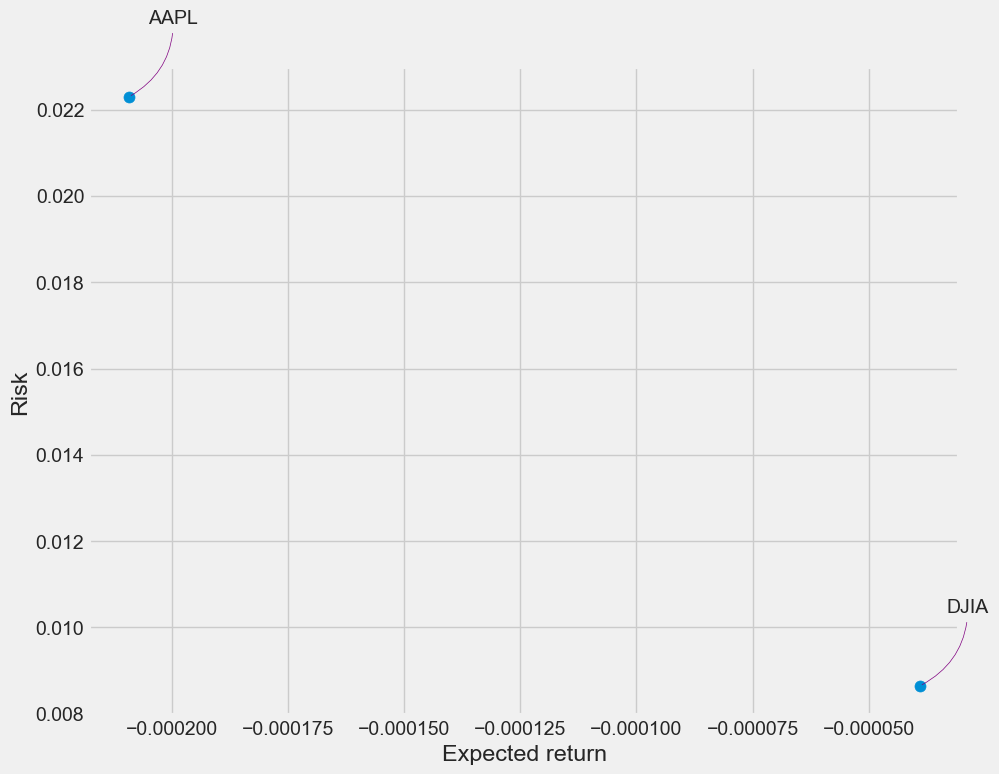

In [259]:
rets = comp_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='purple', connectionstyle='arc3,rad=-0.3'))

## 7. Forecast Stock Price using LSTM
#### Let's try to predict the Adj. Close price of the first Stock
To avoid error and accomodate new stock, we have fixed the start date to 1st Jan 2010

In [260]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500192,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567372,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706895,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839726,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819365,394024400


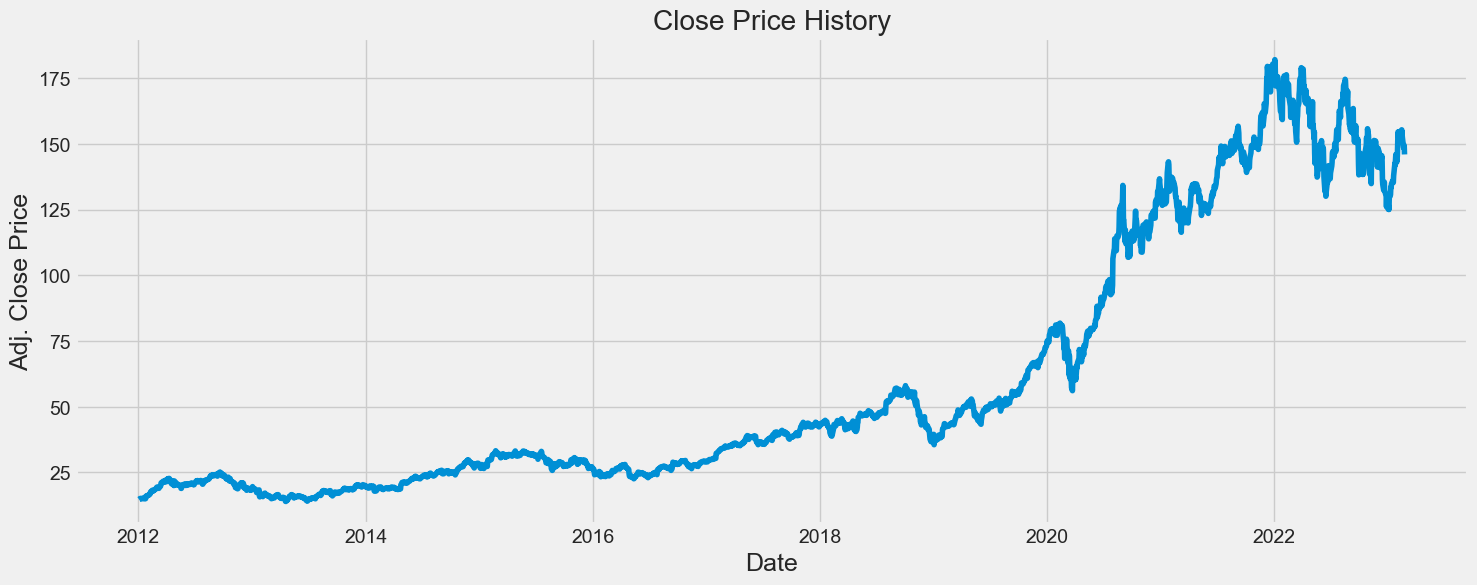

In [261]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Close Price', fontsize=18)
plt.show()

#### 7.1 Finalize Predictive Variable

In [262]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))

training_data_len

2525

#### 7.2 Scale data using Mix Max Scaler

In [263]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.80304951],
       [0.80596503],
       [0.78549653]])

#### 7.3 Split Data into train and validation set

In [264]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

#### 7.4 Initialize and Compile LSTM Model

In [285]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2465/2465 [==============================] - 79s 30ms/step - loss: 0.0017
Epoch 2/5
2465/2465 [==============================] - 73s 30ms/step - loss: 0.0011
Epoch 3/5
2465/2465 [==============================] - 67s 27ms/step - loss: 5.6705e-04
Epoch 4/5
2465/2465 [==============================] - 67s 27ms/step - loss: 4.6892e-04
Epoch 5/5
2465/2465 [==============================] - 67s 27ms/step - loss: 3.7023e-04


In [287]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


#### 7.5 Predict and Evaluate using RMSE

In [302]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9/9 [==============================] - 0s 22ms/step


6.349583648939388

#### 7.6 Plot to vizualize the predict values against actual

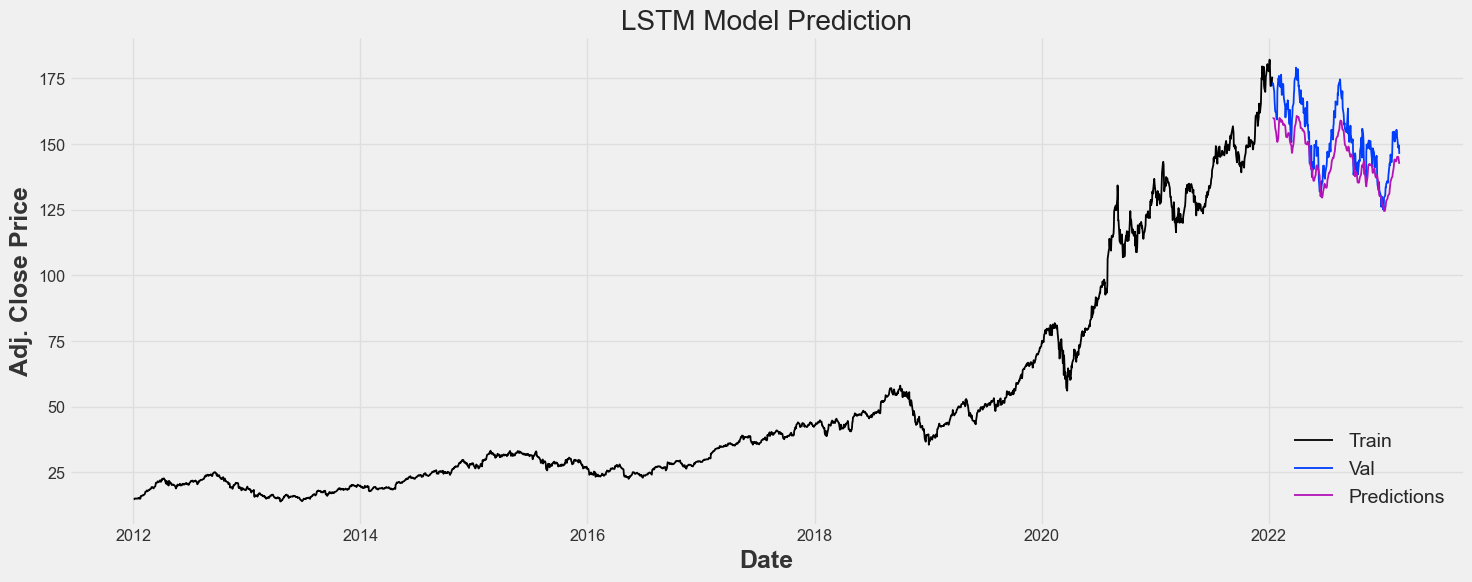

In [303]:
# Plot the data
train = data[:training_data_len]
validate = data[training_data_len:]
validate['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [313]:
def mape(actual, predicted):
    mask = actual != 0
    return (np.fabs(actual - predicted) / actual)[mask].mean() * 100
mape_val = mape(y_test,predictions)

print(f"MAPE on validation set: {mape_val:.2f}%")

MAPE on validation set: 3.52%


In [314]:
# Show the predicted prices vs actual
validate.head(10)

,Close,Predictions
Date,,
2022-01-13,172.190002,167.739578
2022-01-14,173.070007,166.204346
2022-01-18,169.800003,165.050385
2022-01-19,166.229996,163.247269
2022-01-20,164.509995,160.472946
2022-01-21,162.410004,158.303482
2022-01-24,161.619995,156.735153
2022-01-25,159.779999,155.937653
2022-01-26,159.690002,154.942383


#### 7.7 Forecast for 30 days

In [330]:
n_steps1=len(np.concatenate((x_train[1:], x_test[1:])))
fut_inp = np.concatenate((x_train[1:], x_test[1:]))

In [331]:
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
fut_inp.shape

(1, 164580)

In [332]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [333]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=n_steps1
i=0
while(i<30):
    if(len(tmp_inp)>=n_steps):
        fut_inp = np.array(tmp_inp[-n_steps:])
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
    else:
        fut_inp = np.array(tmp_inp)
        fut_inp = fut_inp.reshape((1, len(tmp_inp), 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

[[0.77403324842453], [0.7619760632514954], [0.7451798319816589], [0.7294806838035583], [0.7157950401306152], [0.7038654685020447], [0.6933438777923584], [0.6838833689689636], [0.6751672029495239], [0.6669448614120483], [0.6590455174446106], [0.6513659954071045], [0.643852710723877], [0.636481761932373], [0.6292442679405212], [0.622136652469635], [0.6151556968688965], [0.608296275138855], [0.6015515327453613], [0.5949134230613708], [0.5883737802505493], [0.5819249153137207], [0.5755597949028015], [0.5692724585533142], [0.5630574822425842], [0.5569101572036743], [0.5508259534835815], [0.544800877571106], [0.5388306975364685], [0.5329115390777588]]


In [338]:
#Creating final data for plotting
Next_30days_forecast = scaler.inverse_transform(lst_output).tolist()
Next_30days_forecast=pd.DataFrame(Next_30days_forecast, columns=['30 Days Forecast'])
Next_30days_forecast.head(10)

,30 Days Forecast
0,144.033459
1,142.007098
2,139.184281
3,136.545843
4,134.245800
5,132.240887
6,130.472602
7,128.882645
8,127.417784
9,126.035917


#### 7.8 Forecast for 365 days

In [335]:
lst_output1=[]
n_steps=n_steps1
i=0
while(i<365):
    if(len(tmp_inp)>=n_steps):
        fut_inp1 = np.array(tmp_inp[-n_steps:])
        fut_inp1 = fut_inp1.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp1, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output1.extend(yhat.tolist())
    else:
        fut_inp1 = np.array(tmp_inp)
        fut_inp1 = fut_inp1.reshape((1, len(tmp_inp), 1))
        yhat = model.predict(fut_inp1, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output1.extend(yhat.tolist())
    i=i+1

print(lst_output1)

[[0.5270395278930664], [0.5212108492851257], [0.5154217481613159], [0.5096686482429504], [0.5039481520652771], [0.4982568621635437], [0.4925916790962219], [0.4869495630264282], [0.4813278317451477], [0.47572362422943115], [0.4701346158981323], [0.46455830335617065], [0.45899254083633423], [0.45343512296676636], [0.447884202003479], [0.44233793020248413], [0.4367944598197937], [0.4312524199485779], [0.4257102608680725], [0.420166552066803], [0.41462022066116333], [0.4090700149536133], [0.40351492166519165], [0.3979542851448059], [0.3923872113227844], [0.38681304454803467], [0.3812313675880432], [0.37564170360565186], [0.3700438141822815], [0.36443763971328735], [0.3588230609893799], [0.3532002568244934], [0.34756946563720703], [0.34193098545074463], [0.3362853527069092], [0.3306332230567932], [0.32497528195381165], [0.3193124532699585], [0.31364569067955017], [0.30797621607780457], [0.3023052513599396], [0.29663413763046265], [0.29096442461013794], [0.28529781103134155], [0.279635906219

In [339]:
Next_365days_forecast = scaler.inverse_transform(lst_output1).tolist()
Next_365days_forecast=pd.DataFrame(Next_365days_forecast, columns=['365 Days Forecast'])
Next_365days_forecast.head(10)

,365 Days Forecast
0,102.523078
1,101.543496
2,100.570565
3,99.603685
4,98.642284
5,97.685791
6,96.733686
7,95.785458
8,94.840656
9,93.898799


## 8. Conclusion
Time series prediction can become less accurate as we move further into the future for several reasons:

<strong>Increasing uncertainty:</strong> As we move further into the future, there is typically more uncertainty about what will happen. This uncertainty can come from changes in external factors that affect the time series, such as economic conditions, weather patterns, or geopolitical events.

<strong>Model limitations:</strong> Time series prediction models are designed to make predictions based on past data, and the further into the future we go, the less relevant this past data becomes. This means that the model's ability to accurately predict future values decreases as we move further into the future.

<strong>Complexity of patterns:</strong> Time series data often exhibit complex patterns, and it can be difficult for models to capture all of these patterns accurately. As we move further into the future, these patterns may become even more complex or may change in ways that are difficult to predict, which can make it harder for models to accurately predict future values.

Overall, predicting time series accurately over long periods of time is a challenging task that requires sophisticated modeling techniques and careful consideration of the underlying data and external factors that may impact the time series.

----------------------xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx----------------xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx-------------------------